@author: Valentin Larrieu

In [11]:
from sklearn.decomposition import FastICA
import pandas as pd
SEED = 1234

In [1]:
from time import time

from sklearn import datasets
from sklearn import decomposition
from sklearn.feature_extraction import text

n_samples = 1000
n_features = 900
n_topics = 10
n_top_words = 20

# Load the 20 newsgroups dataset and vectorize it using the most common word
# frequency with TF-IDF weighting (without top 5% stop words)

t0 = time()
print("Loading dataset and extracting TF-IDF features...")
dataset = datasets.fetch_20newsgroups(data_home='c:/tmp/', shuffle=True,
                                      random_state=1)

vectorizer = text.CountVectorizer(max_df=0.95, max_features=n_features)
counts = vectorizer.fit_transform(dataset.data[:n_samples])
tfidf = text.TfidfTransformer().fit_transform(counts)
print("done in %0.3fs." % (time() - t0))

# Fit the NMF model
# print("Fitting the NMF model on with n_samples=%d and" +
#       "n_features=%d..." % (n_samples, n_features))
nmf = decomposition.NMF(n_components=n_topics).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

# Inverse the vectorizer vocabulary to be able
feature_names = vectorizer.get_feature_names()

for topic_idx, topic in enumerate(nmf.components_):
    print("Topic #%d:" % topic_idx)
    print(" ".join([feature_names[i]
                    for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

Loading dataset and extracting TF-IDF features...
done in 118.412s.
done in 119.346s.
Topic #0:
the of in and on was to as at is which by were one with for they that when two

Topic #1:
chip clipper key the to encryption keys government be will this public as is or of can that it use

Topic #2:
is that of to not are and the we in as be people they it this there or god their

Topic #3:
edu university host posting cs nntp of re in article cc writes reply distribution washington cwru state mit for anyone

Topic #4:
com hp in article writes inc netcom corp stratus re sun posting nntp host dec ca jim org that corporation

Topic #5:
he his was to and him that who the had my in it but year this ca me team be

Topic #6:
uk ac co of university ___ dc posting host nntp thanks __ sorry college it please where return sun writes

Topic #7:
you to it your my have can if do and that car get like with don on what just so

Topic #8:
nasa gov space center research we shuttle program in as of the and dis

Dataset consists of 400 faces
2061 negative-valued pixels
2773 negative-valued pixels
2630 negative-valued pixels
1422 negative-valued pixels
1242 negative-valued pixels
1004 negative-valued pixels
2049 negative-valued pixels


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:3361: MatplotlibDeprecationWarning: The 'hold' keyword argument is deprecated since 2.0.
  mplDeprecation)


1580 negative-valued pixels
1387 negative-valued pixels
3819 negative-valued pixels
Extracting the top 10 Eigenfaces - PCA...
done in 0.215s
3998 negative-valued pixels
2078 negative-valued pixels
1967 negative-valued pixels
1862 negative-valued pixels
2261 negative-valued pixels
1924 negative-valued pixels
1951 negative-valued pixels
1881 negative-valued pixels
2221 negative-valued pixels
2130 negative-valued pixels
Extracting the top 10 Non-negative components - NMF...


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:3361: MatplotlibDeprecationWarning: The 'hold' keyword argument is deprecated since 2.0.
  mplDeprecation)


done in 6.968s


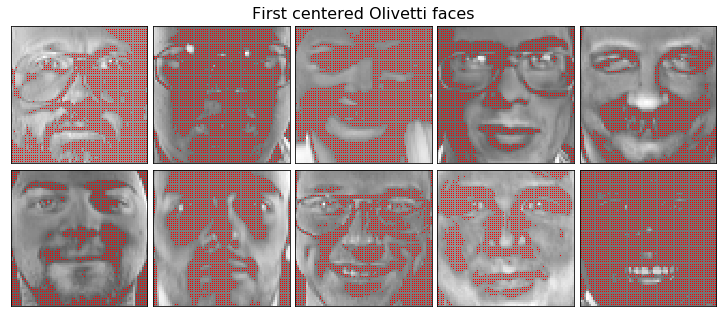

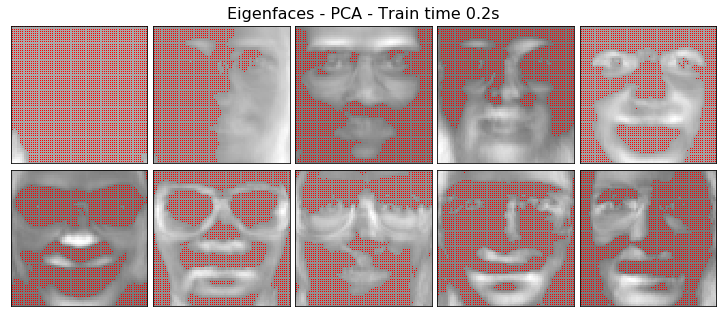

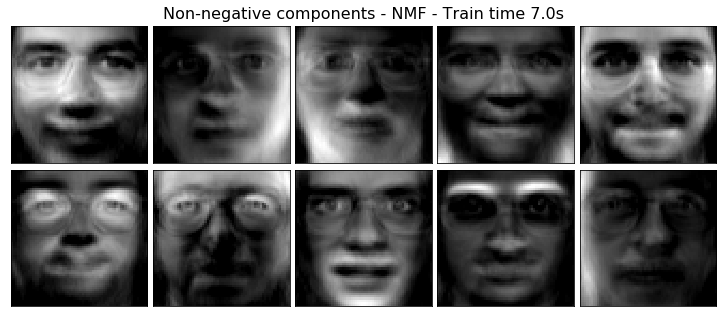

In [19]:
from time import time

import matplotlib.pyplot as plt

import numpy as np
from numpy.random import RandomState

from sklearn import decomposition
from sklearn.datasets import fetch_olivetti_faces

# -- Prepare data and define utility functions --------------------------------
  
    
    
n_row, n_col = 2, 5
n_components = n_row * n_col
image_shape = (64, 64)
rng = RandomState(0)

# Load faces data
dataset = fetch_olivetti_faces(shuffle=True, random_state=rng)
faces = dataset.data

n_samples, n_features = faces.shape

# global centering
faces_centered = faces - faces.mean(axis=0, dtype=np.float64)

print ("Dataset consists of %d faces" % n_samples)


def plot_gallery(title, images):
    """Plot images as gallery"""
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        comp = comp.reshape(image_shape)
        vmax = comp.max()
        vmin = comp.min()
        dmy = np.nonzero(comp < 0)
        if len(dmy[0]) > 0:
            yz, xz = dmy
        comp[comp < 0] = 0

        plt.imshow(comp, cmap=plt.cm.gray, vmax=vmax, vmin=vmin)

        if len(dmy[0]) > 0:
            plt.plot(xz, yz, 'r,', hold=True)
            print(len(dmy[0]), "negative-valued pixels")

        plt.xticks(())
        plt.yticks(())

    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

# Plot a sample of the input data
plot_gallery("First centered Olivetti faces", faces_centered[:n_components])

# -- Decomposition methods ----------------------------------------------------

# List of the different estimators and whether to center the data

estimators = [
    ('pca', 'Eigenfaces - PCA',
     decomposition.PCA(n_components=n_components, whiten=True),
     True),

    ('nmf', 'Non-negative components - NMF',
     decomposition.NMF(n_components=n_components, init=None, tol=1e-6, max_iter=1000),
     False)
]

# -- Transform and classify ---------------------------------------------------

labels = dataset.target
X = faces
X_ = faces_centered

for shortname, name, estimator, center in estimators:
    #if shortname != 'nmf':
    #    continue
    print("Extracting the top %d %s..." % (n_components, name))
    t0 = time()

    data = X
    if center:
        data = X_

    data = estimator.fit_transform(data)

    train_time = (time() - t0)
    print("done in %0.3fs" % train_time)

    components_ = estimator.components_

    plot_gallery('%s - Train time %.1fs' % (name, train_time),
                 components_[:n_components])

plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


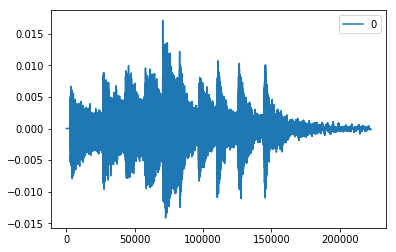

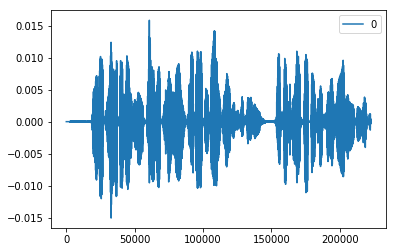

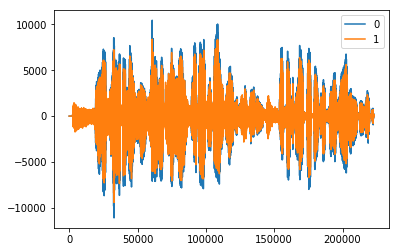

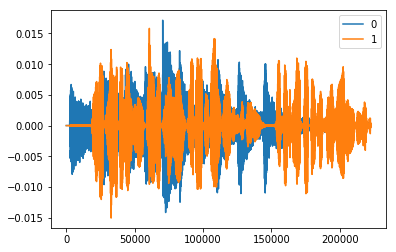

In [16]:
import wave

import matplotlib.pyplot as plt
import numpy as np

from sklearn import decomposition

# -- Read audio data ----------------------------------------------------------


def wavread(filename):
    """Read .wav file"""
    wf = wave.open(filename)
    s = np.fromstring(wf.readframes(wf.getnframes()), dtype=np.int16)
    wf.close()
    return s


def wavwrite(filename, s, nchannels=1):
    """Write .wav file"""
    wf = wave.open(filename, 'wb')
    wf.setnchannels(nchannels)
    wf.setsampwidth(2)
    wf.setframerate(32000)
    s = s / np.max(np.abs(s)) * 2 ** 14  # normalise arbitrarily
    wf.writeframes(s.astype(np.int16).tostring())
    wf.close()

s1 = wavread('./Files/snd/es02.wav')
s2 = wavread('./Files/snd/si01.wav')

# -- Create stereo mix --------------------------------------------------------

nsmp = min(len(s1), len(s2))
s1 = s1[:nsmp]
s2 = s2[:nsmp]
S = np.c_[s1, s2]
# Mixing matrix
A = np.array([[0.6, 0.5],
              [0.4, 0.5]])
# Do the mix
X = S.dot(A)
# Write mix file
x = np.zeros(2 * nsmp)
x[::2] = X[:, 0]
x[1::2] = X[:, 1]
wavwrite('./Files/mix.wav', x, nchannels=2)

# -- ICA source separation ----------------------------------------------------
transf = FastICA(n_components=2, random_state = SEED)
x_transf = transf.fit_transform(X)


# Visualise sources
pd.DataFrame(x_transf[:,0]).plot()
pd.DataFrame(x_transf[:,1]).plot()
pd.DataFrame(X).plot()
pd.DataFrame(x_transf).plot()

# Write audio sources
wavwrite('./Files/v0.wav', x_transf[:,0], nchannels=1)
wavwrite('./Files/v1.wav', x_transf[:,1], nchannels=1)